# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [193]:
# Import the libraries you'll need here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Load the cars csv file into a pandas dataframe.


In [194]:
# Load the csv file into a pandas dataframe.
df = pd.read_csv('data/cars.csv', sep = ',')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [195]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

720


In [196]:
#  2. Modify our df to have all duplicate rows removed. 

df = df.drop_duplicates()

#quick check
print(df.duplicated().sum())

0


In [197]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
#make sure duplicates are dropped
print(df.duplicated().sum())
print(df.shape)


0
(11194, 15)


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [198]:
# * Which column has the most null values and how many null values does it have?
#totalNull = (df.isnull().sum()).sum();
#print(totalNull)

colName = df.isnull().sum().idxmax()
maxNull = df.isnull().sum().max()
print("Column with most null values:")
print(colName, " ", maxNull)



Column with most null values:
Engine HP   69


In [199]:
# * Print how long (aka how many rows) our dataframe is.
print(df.shape)

(11194, 15)


In [200]:
# * Remove any row that has a null value in it. 
df = df.dropna()


In [201]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape)



(11092, 15)


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

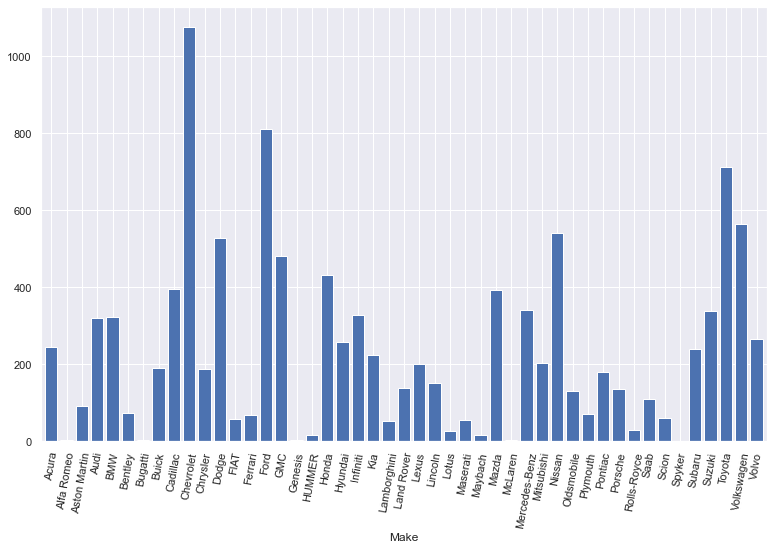

In [202]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
gb = df.groupby('Make')['Make'].count()
gb.plot(kind = 'bar', figsize = (13, 8), width = 0.8)
plt.xticks(rotation = 80)


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

Text(0.5, 0, 'Count')

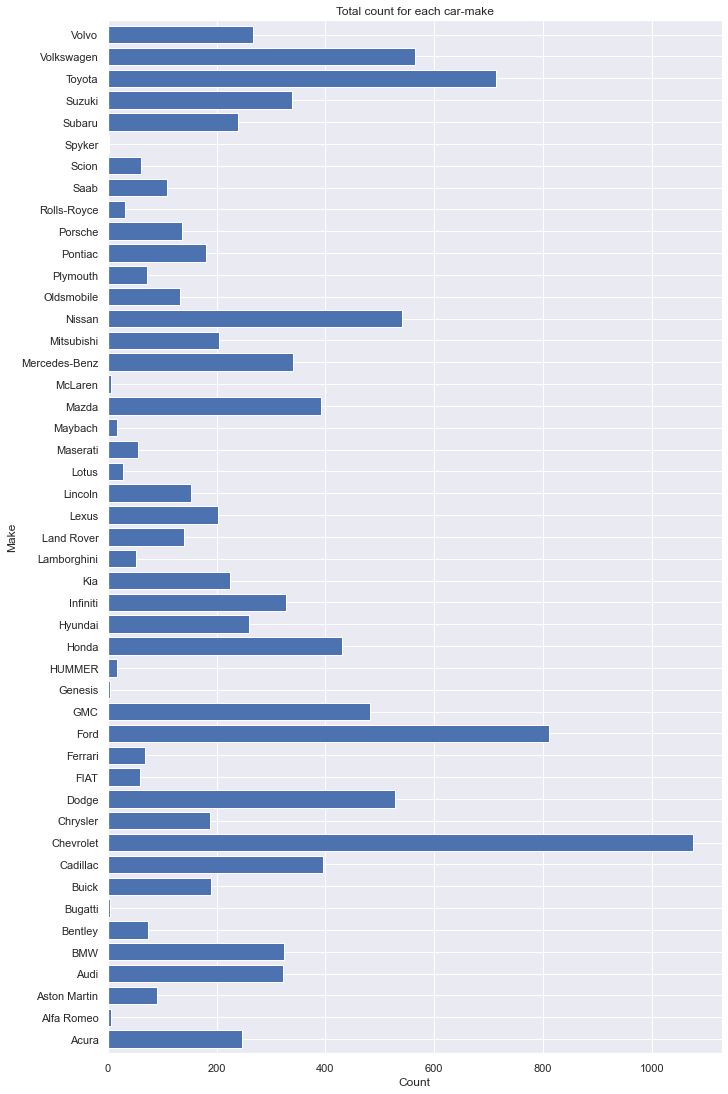

In [203]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
ax = gb.plot(kind = 'barh', figsize=(11,19), width=0.8)
plt.title("Total count for each car-make")
ax.set_xlabel('Count')

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


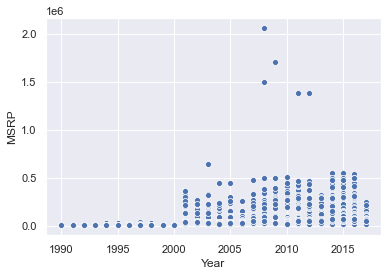

In [204]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
sns.set()
ax = sns.scatterplot(data = df, x = 'Year', y = 'MSRP')


# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.  
_Hint use `np.where()`_.

In [205]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
c1 = df['Year'] < 2000 
df['Adjusted_Price'] = np.where(c1, df['MSRP']*10, df['MSRP'])
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Adjusted_Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

(0.0, 700000.0)

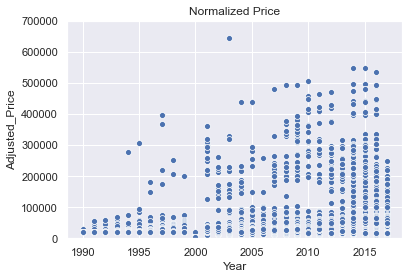

In [206]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000
ax = sns.scatterplot(data = df, x='Year', y='Adjusted_Price')
ax.set_title('Normalized Price')
ax.set_ylim(bottom = 0, top = 700000)


# What car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. _Hint, you can use df.head(5) for this_.
* Use our `adjusted_price` column for this

In [207]:
# What top 5 car makers make the most expensive cars on average. 
dff = df.sort_values('Adjusted_Price', ascending = False)
dff.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Adjusted_Price
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,2065902,2065902
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,1705769,1705769
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,1500000,1500000
8486,Lamborghini,Reventon,2008,premium unleaded (required),650.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,9,1158,1500000,1500000
6351,Maybach,Landaulet,2012,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Convertible,16,10,67,1382750,1382750


# What are the top 5 car makers that have the highest median highway MPG?

In [208]:
# Which car makers have the highest median highway MPG?
gb = df.groupby('Make')['highway MPG'].median().nlargest(5)
gb

Make
Alfa Romeo    34
FIAT          33
Honda         32
Scion         32
Volkswagen    32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

In [209]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

makers = ['Chevrolet', 'Ford', 'Toyota']
sns.histplot(data = df, x = 'Make', y = 'Adjusted_Price')


AttributeError: module 'seaborn' has no attribute 'histplot'

# Remake the same histogram, but limit the x-axis from 0 to 100,000

In [ ]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000




# Plot the relationship between Engine HP and highway MPG

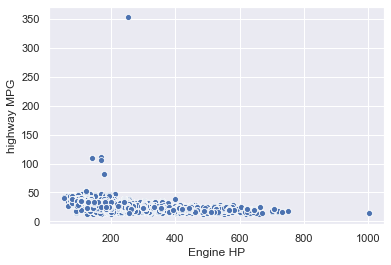

In [210]:
# Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data = df, x = 'Engine HP', y = 'highway MPG')



# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

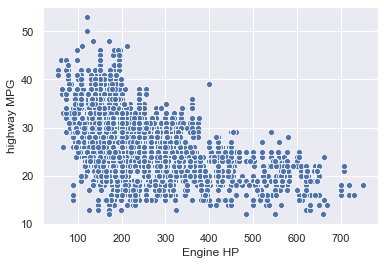

In [211]:
# Remove any statisical outliers from Engine HP and highway MPG

conditionHP = df['Engine HP'] < 800
conditionMPG = df['highway MPG'] < 80
df = df[conditionHP & conditionMPG]
sns.scatterplot(data = df, x = 'Engine HP', y = 'highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [212]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('The lower the Engine HP the higher the highway MPG')

The lower the Engine HP the higher the highway MPG


# Using a pairplot, display all of the linear relationships.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

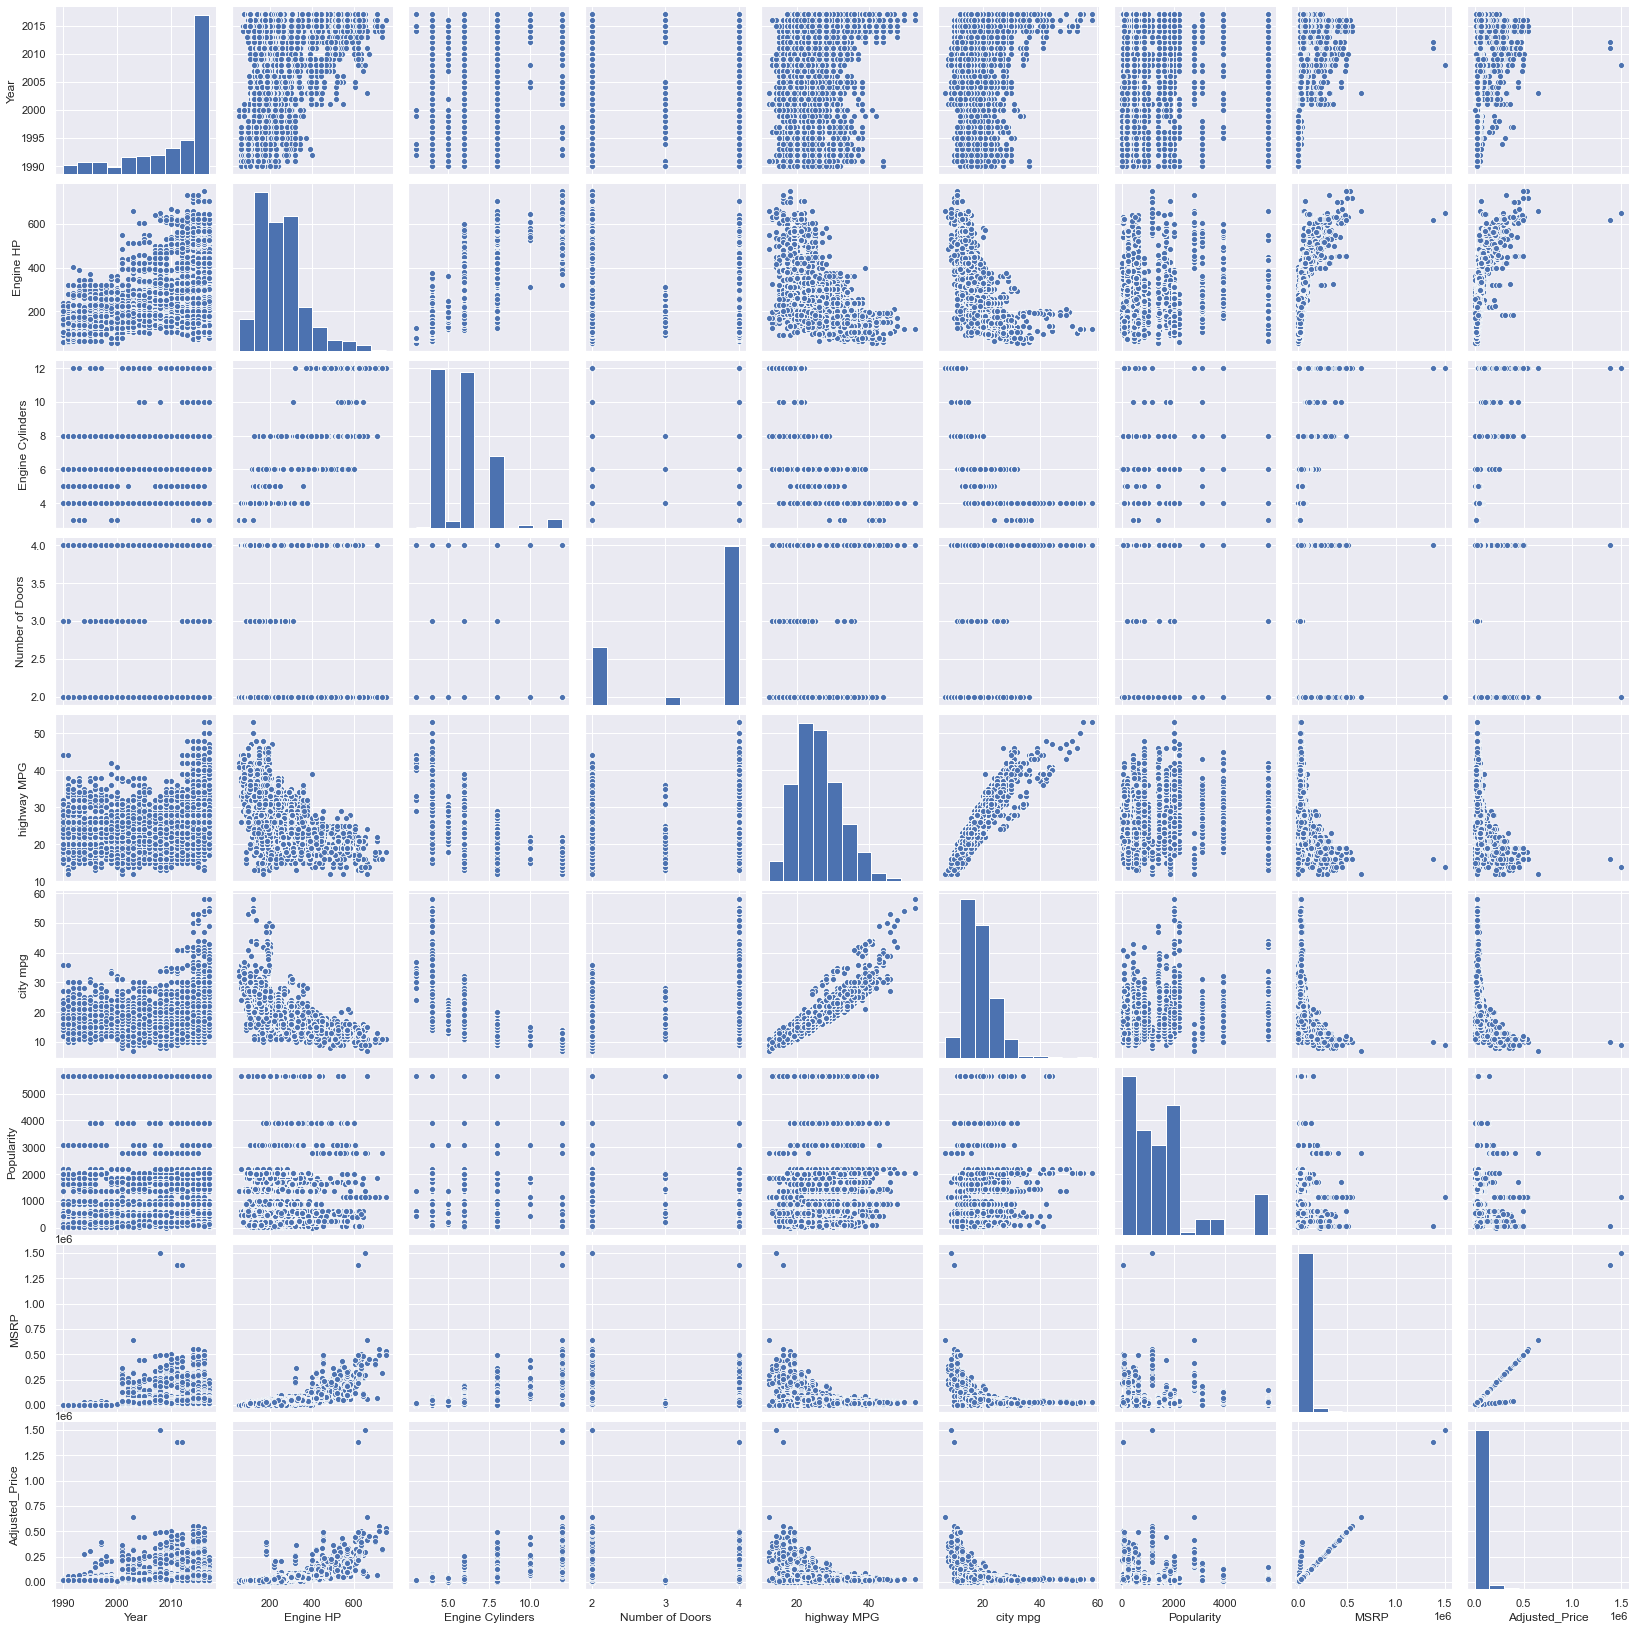

In [213]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)



In [214]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('I think the stronges linear relationship is between \'highway MPG\' and \'city MPG\'')



I think the stronges linear relationship is between 'highway MPG' and 'city MPG'


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

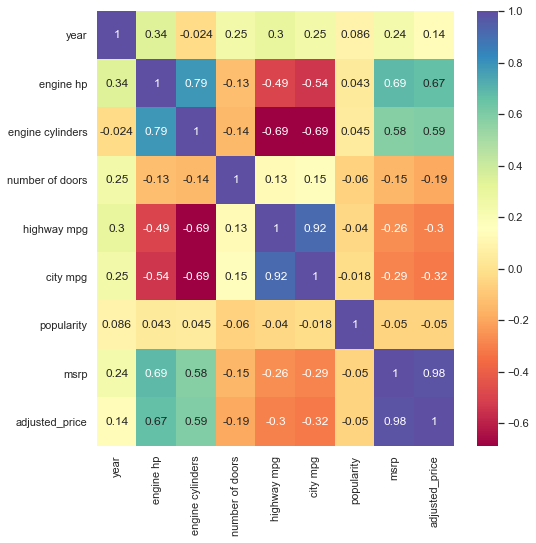

In [219]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Spectral')

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [223]:
# * In the column names, replace all the spaces with an underscore, 
#   and make them all lowercase as well

df = df.rename(columns=lambda x: x.lower())
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


# Extra Credit part 2
Rebuild the charts you made but using the interactive plotting library, Plotly:  https://plotly.com/python/.  
* You may need to install plotly by running `pip install plotly` in your terminal. 